In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv')
originalFeatures = data.columns
print('Original Features Count: ', len(originalFeatures))
print('Original Features : ', originalFeatures)


Original Features Count:  25
Original Features :  Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')


In [2]:
data.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


Text(0.5, 1.0, 'lat and lon')

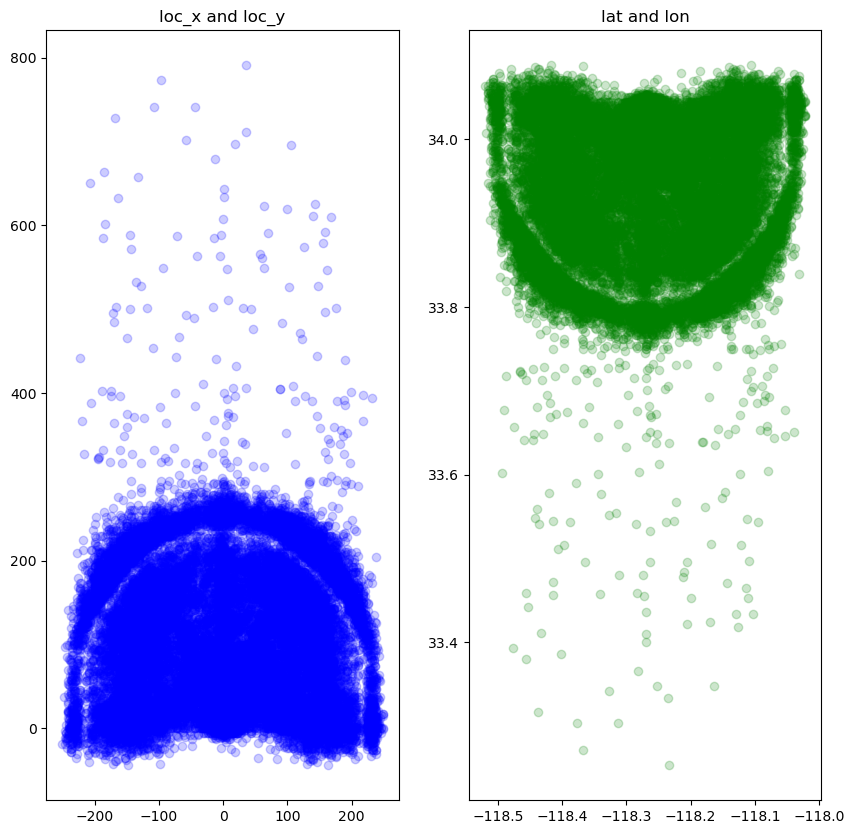

In [3]:
#Checking loc_x and loc_y columns. (probably latitude and longitude)
alpha = 0.2
plt.figure(figsize=(10,10))

plt.subplot(121)
plt.scatter(data.loc_x, data.loc_y, color='blue', alpha = alpha)
plt.title('loc_x and loc_y')

#lat and lon
plt.subplot(122)
plt.scatter(data.lon, data.lat, color='green', alpha=alpha)
plt.title('lat and lon')

In [4]:
#we get the shape of a basketball court. The top and button 'D'
#Changing them into polar coordinates for better analysis
data['dist']=np.sqrt(data['loc_x']**2 +data['loc_y']**2)

loc_x_zero = data['loc_x'] == 0
data['angle'] = np.array([0]*len(data))
data['angle'][~loc_x_zero] = np.arctan(data['loc_y'][~loc_x_zero] / data['loc_x'][~loc_x_zero])
data['angle'][loc_x_zero] = np.pi/2
#with these new columns, we dont need the old lat and long columns

C:\Users\Garima\AppData\Local\Temp\ipykernel_26036\632553214.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['angle'][~loc_x_zero] = np.arctan(data['loc_y'][~loc_x_zero] / data['loc_x'][~loc_x_zero])


In [5]:
#Combining remaining minutes and seconds columns into one
data['remaining_time'] = data['minutes_remaining']*60+data['seconds_remaining']
data

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,dist,angle,remaining_time
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1,181.859836,0.407058,627
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2,157.000000,-0.000000,622
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3,168.600119,-0.928481,465
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4,222.865430,0.903063,412
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5,0.000000,1.570796,379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30692,Jump Shot,Jump Shot,397,49900088,33.9963,1,48,-118.2688,6,4,...,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30693,48.010416,1.549966,365
30693,Tip Shot,Tip Shot,398,49900088,34.0443,0,0,-118.2698,6,4,...,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30694,0.000000,1.570796,365
30694,Running Jump Shot,Jump Shot,426,49900088,33.8783,-134,166,-118.4038,3,4,...,16-24 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30695,213.335417,-0.891663,208
30695,Jump Shot,Jump Shot,448,49900088,33.7773,31,267,-118.2388,2,4,...,24+ ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30696,268.793601,1.455209,130


In [6]:
#Team_id and team name
print(data['team_id'].unique())
print(data['team_name'].unique())

[1610612747]
['Los Angeles Lakers']


In [7]:
#Both columns contain only one value, so we can filter out the column

In [8]:
#Matchup and opponent
pd.DataFrame({'matchup':data.matchup, 'opponent':data.opponent})

,matchup,opponent
0,LAL @ POR,POR
1,LAL @ POR,POR
2,LAL @ POR,POR
3,LAL @ POR,POR
4,LAL @ POR,POR
...,...,...
30692,LAL vs. IND,IND
30693,LAL vs. IND,IND
30694,LAL vs. IND,IND
30695,LAL vs. IND,IND


In [9]:
#These two basically contain the same info

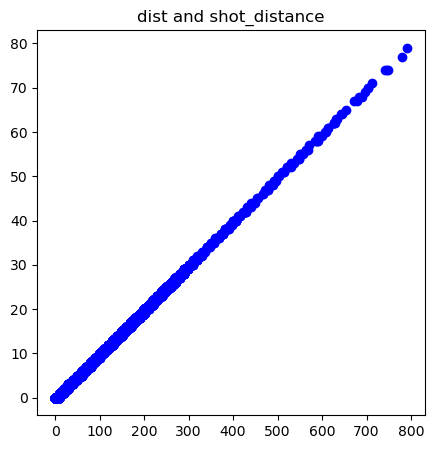

In [10]:
#distance and shot_distance
plt.figure(figsize=(5,5))
plt.scatter(data.dist, data.shot_distance, color='blue')
plt.title('dist and shot_distance')
plt.show()

In [11]:
#same info

Text(0.5, 1.0, 'shot_zone_area')

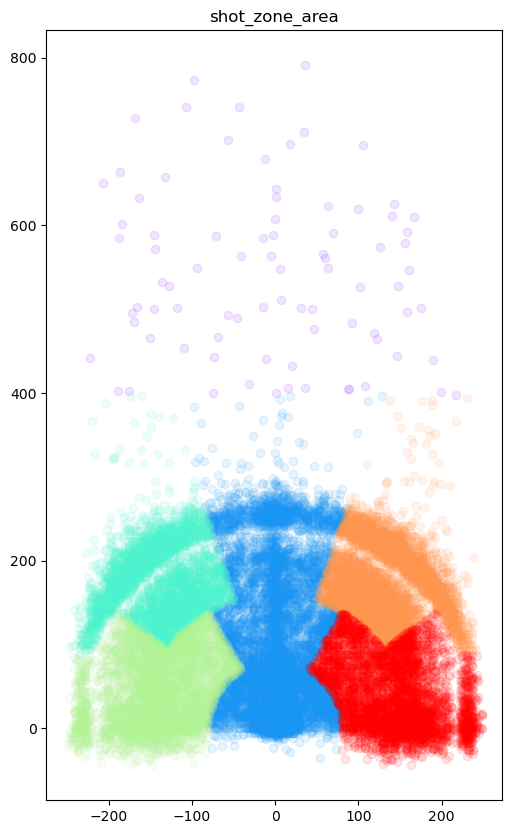

In [12]:
#Looking at shot_zone_area, shot_zone_basic, shot_zone_range
import matplotlib.cm as cm
plt.figure(figsize=(20,10))

def scatter_plot_by_category(feat):
    alpha = 0.1
    gs = data.groupby(feat)
    cs = cm.rainbow(np.linspace(0,1,len(gs)))
    for g,c in zip(gs,cs):
        plt.scatter(g[1].loc_x, g[1].loc_y, color=c, alpha=alpha)

#shot_zone_area
plt.subplot(131)
scatter_plot_by_category('shot_zone_area')
plt.title('shot_zone_area')
                

                    

Text(0.5, 1.0, 'shot_zone_basic')

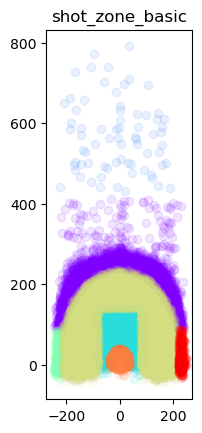

In [13]:


#shot_zone_basic
plt.subplot(131)
scatter_plot_by_category('shot_zone_basic')
plt.title('shot_zone_basic')
                    

Text(0.5, 1.0, 'shot_zone_range')

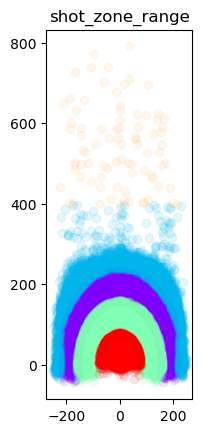

In [14]:

#shot_zone_range
plt.subplot(131)
scatter_plot_by_category('shot_zone_range')
plt.title('shot_zone_range')

In [15]:
#They are the regions of the court , but we have already stored this info in angle and dist columns


In [16]:
#Dropping the useless columns
drops = ['shot_id','team_id','team_name','shot_zone_area','shot_zone_range','shot_zone_basic','matchup','lon','lat','seconds_remaining','minutes_remaining','shot_distance','loc_x','loc_y','game_event_id','game_id','game_date']
for drop in drops:
    data = data.drop(drop,1)

C:\Users\Garima\AppData\Local\Temp\ipykernel_26036\118977150.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop(drop,1)
C:\Users\Garima\AppData\Local\Temp\ipykernel_26036\118977150.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop(drop,1)
C:\Users\Garima\AppData\Local\Temp\ipykernel_26036\118977150.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop(drop,1)
C:\Users\Garima\AppData\Local\Temp\ipykernel_26036\118977150.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop(drop,1)
C:\Users\Garima\AppData\Local\Temp\ipykernel_26036\118977150.py:4: FutureWarning: In a future ve

In [17]:
# Useless and re-occuring features have been dropped

In [18]:
print('Original columns count: ',len(originalFeatures))
print('New Count: ',len(data.columns))

Original columns count:  25
New Count:  11


In [19]:
data.head()

,action_type,combined_shot_type,period,playoffs,season,shot_made_flag,shot_type,opponent,dist,angle,remaining_time
0,Jump Shot,Jump Shot,1,0,2000-01,NaN,2PT Field Goal,POR,181.859836,0.407058,627
1,Jump Shot,Jump Shot,1,0,2000-01,0.0,2PT Field Goal,POR,157.000000,-0.000000,622
2,Jump Shot,Jump Shot,1,0,2000-01,1.0,2PT Field Goal,POR,168.600119,-0.928481,465
3,Jump Shot,Jump Shot,1,0,2000-01,0.0,2PT Field Goal,POR,222.865430,0.903063,412
4,Driving Dunk Shot,Dunk,2,0,2000-01,1.0,2PT Field Goal,POR,0.000000,1.570796,379


In [22]:
# Conclusion: Columns reduced to 11 from 25 using Filter Method
